In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [168]:
df = pd.read_csv('data/Klub Kouzelníků_ Immortal_2018_11_17 12_43.csv', encoding='utf-8', engine='python', 
                 quotechar='"', verbose=True)
# df = pd.read_csv('data/Klub Kouzelníků_ Immortal_2018_11_17 12_43-stub.csv', encoding='utf-8', engine='python', 
#                  quotechar='"', verbose=True)
# df = pd.read_csv('data/Klub Kouzelníků_ Immortal_2018_11_17 12_43-stub-2.csv', encoding='utf-8', engine='python', 
#                  verbose=True, header=0, index_col=False)
# df = pd.read_csv('data/Klub Kouzelníků_ Immortal_2018_11_17 12_43-stub-2.csv', encoding='utf-8', engine='python')
df = df.reset_index()
df.columns = ["Date","Time","UserID","UserName","MessageBody"]
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.drop(columns=['Date', 'Time'])

Filled 15079 NA values in column Date


In [169]:
df.describe()

,UserID
count,3.362740e+05
mean,9.018658e+13
std,2.975310e+13
min,1.125265e+09
25%,1.000002e+14
50%,1.000004e+14
75%,1.000009e+14
max,1.000299e+14


In [170]:
df.head(10)

,UserID,UserName,MessageBody,DateTime
0,1764877696,Michal Svoboda,Za celý prázdniny,2017-06-14 14:46:39
1,100000219586446,Daniel Lečo Le,Pak nejaky videjka a fotecky pls,2017-06-14 14:46:40
2,100000455812182,Lukáš Aaron Tesař,jsem si uvědomil jednu věc,2017-06-14 14:46:48
3,100000455812182,Lukáš Aaron Tesař,budu chlastat 23.,2017-06-14 14:46:52
4,100000455812182,Lukáš Aaron Tesař,pak 8.,2017-06-14 14:46:55
5,100000455812182,Lukáš Aaron Tesař,a pak na Adviku,2017-06-14 14:46:58
6,100000219586446,Daniel Lečo Le,Kdy je ta parba u Furika btw?,2017-06-14 14:47:01
7,100000455812182,Lukáš Aaron Tesař,a jestli bude i Igorrr,2017-06-14 14:47:03
8,100000455812182,Lukáš Aaron Tesař,no do píči :D,2017-06-14 14:47:05
9,100000455812182,Lukáš Aaron Tesař,co vole?,2017-06-14 14:47:09


In [171]:
df.dtypes

UserID                  int64
UserName               object
MessageBody            object
DateTime       datetime64[ns]
dtype: object

### Some basic statistics


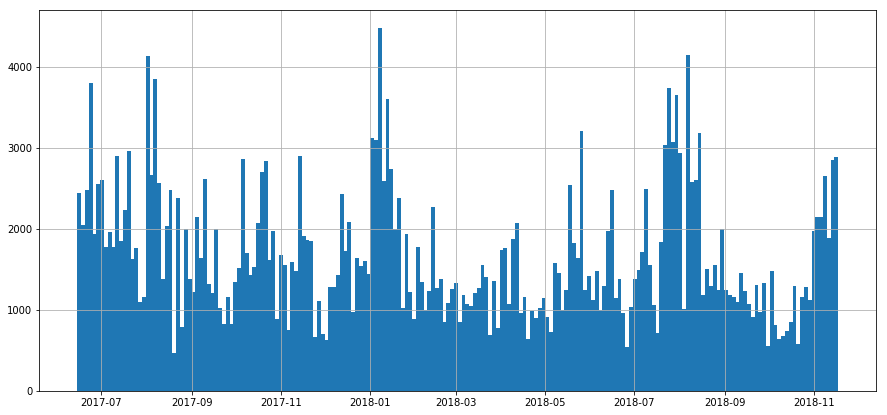

In [178]:
df['DateTime'].hist(bins=200, figsize=(15, 7))

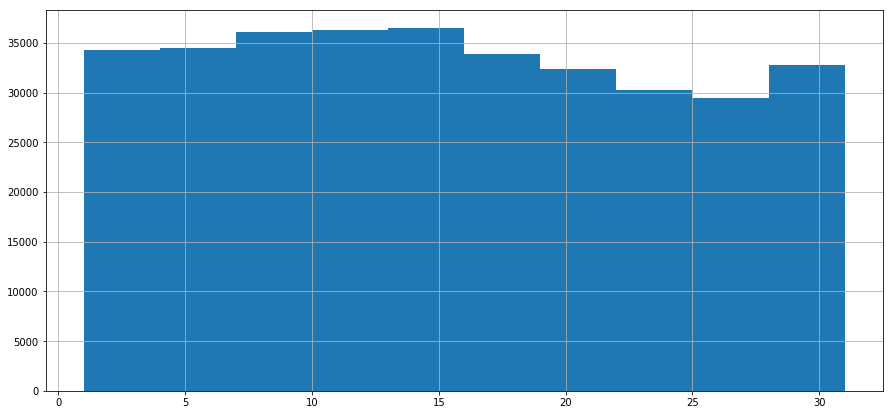

In [181]:
df['DateTime'].dt.day.hist(figsize=(15, 7))

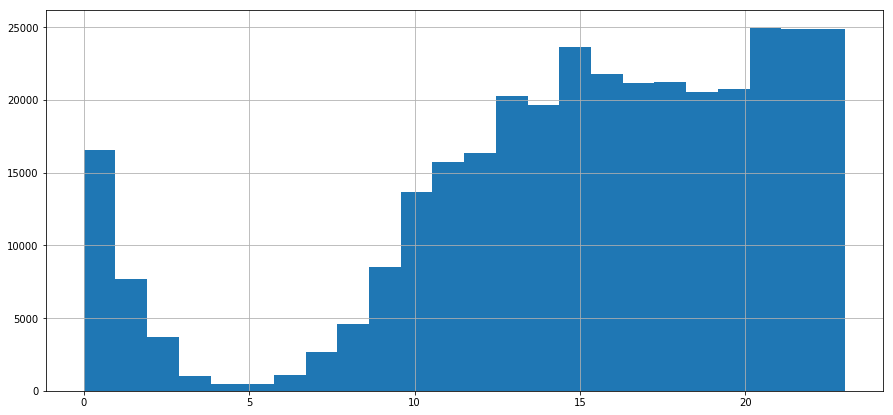

In [197]:
df['DateTime'].dt.hour.hist(bins=24, figsize=(15, 7))

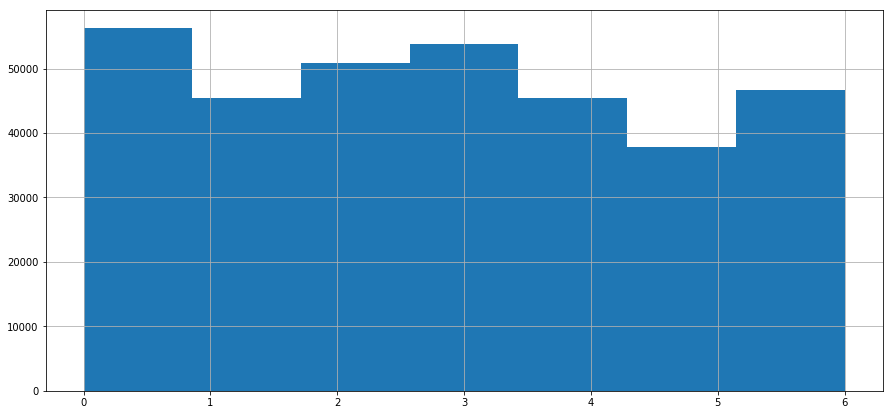

In [183]:
df['DateTime'].dt.dayofweek.hist(bins=7, figsize=(15, 7))

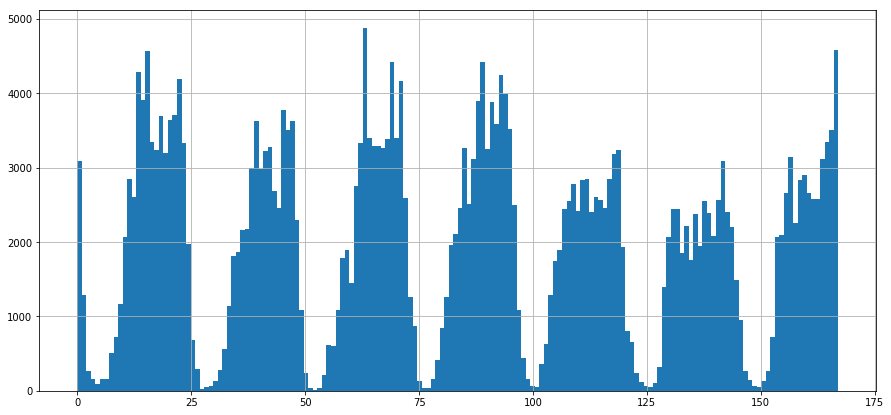

In [188]:
(df['DateTime'].dt.dayofweek * 24 + df['DateTime'].dt.hour).hist(bins=24 * 7, figsize=(15, 7))

In [ ]:
df['UserName'].value_counts()

In [204]:
df['UserName'].value_counts()[:35]

Niko Albert                     34050
Dominik Krisztof                29362
Filip Tran                      24841
Adam Krása                      24785
Adam Furik                      22498
Daniel Lečo Le                  22401
Zdeněk Pešek                    21670
Michal Mikuš                    21363
Lucas Dičér                     21239
Lukáš Aaron Tesař               16487
Zdeněk Pala                     13606
Michal Svoboda                   7915
Michal Fox Řehák                 7354
Kuba Lysák                       6923
Matěj Račinský                   6800
Vojtěch Malman Divák             5657
Honza Horgoš                     5223
Oleksandra Dihuljar              3519
Žožo Králík                      3453
Jan Švajka                       3417
Removed user 100015789908981     2670
Honza Kelemen                    2490
Jakub Jezdinský                  2360
Dominik Lovi Staněk              2195
Michal Ulf Knězů                 2131
Luba Kelnar                      2129
Martin Rédr 

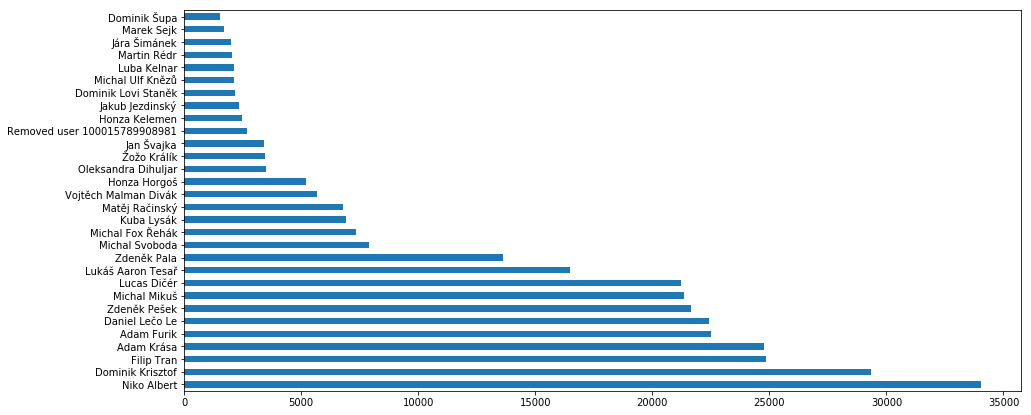

In [195]:
df['UserName'].value_counts()[:30].plot.barh(figsize=(15, 7))

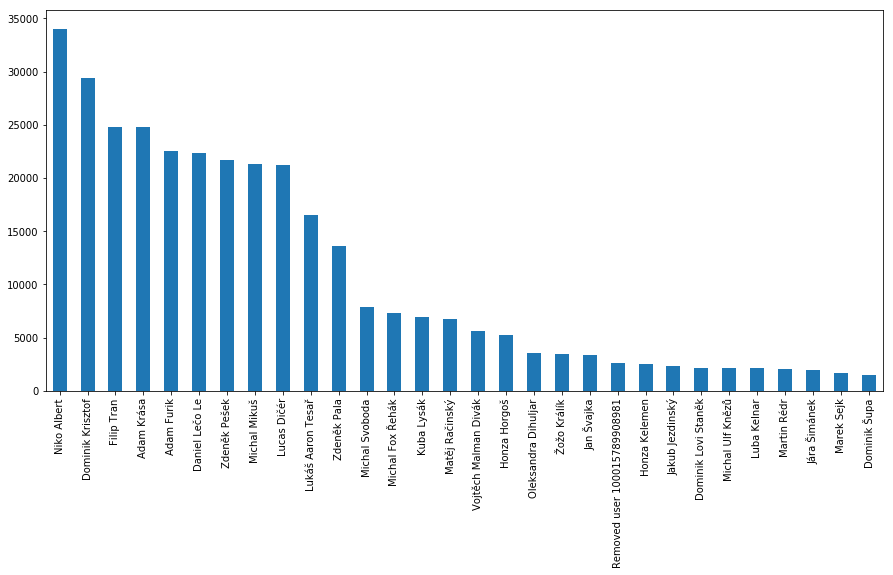

In [196]:
df['UserName'].value_counts()[:30].plot.bar(figsize=(15, 7))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


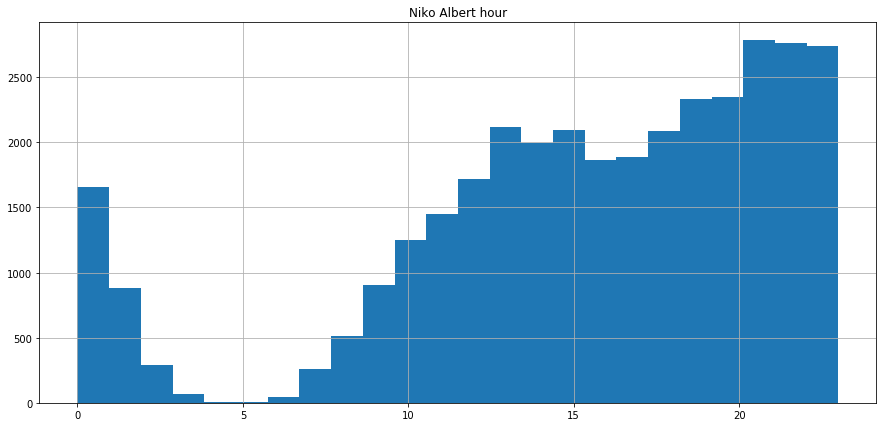

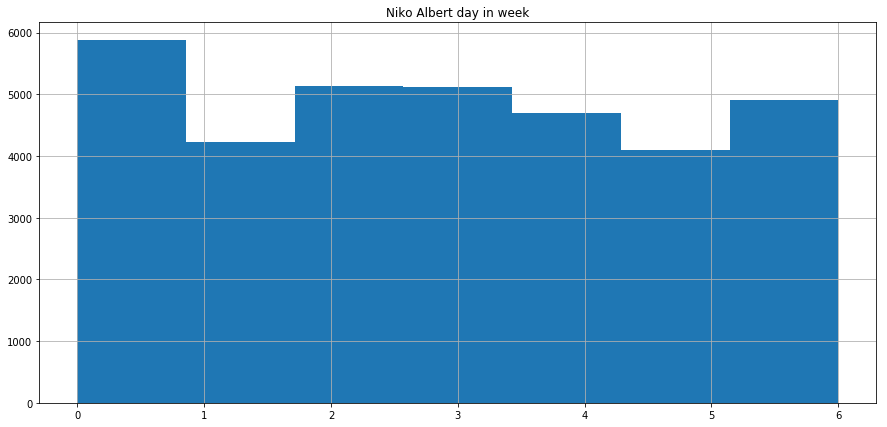

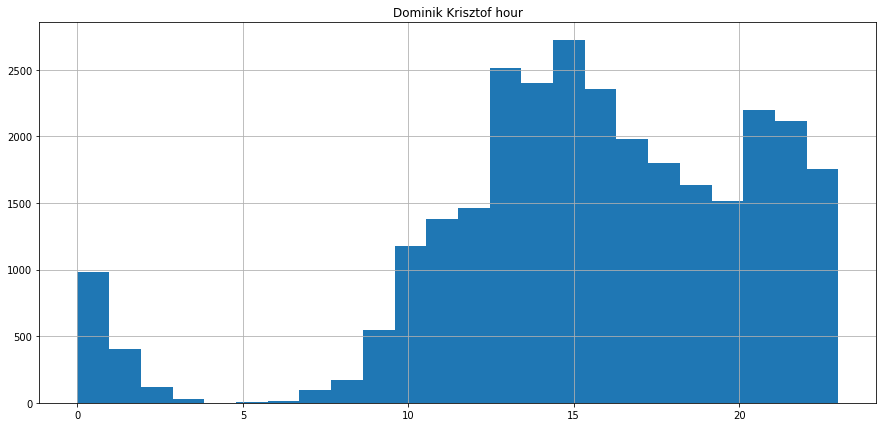

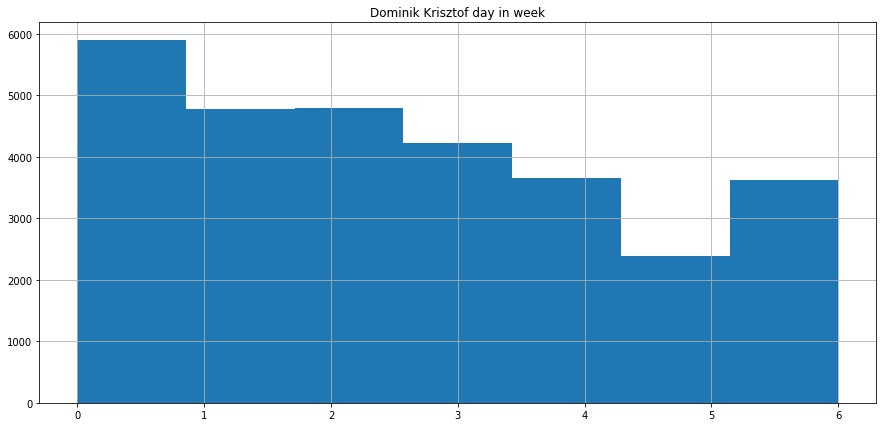

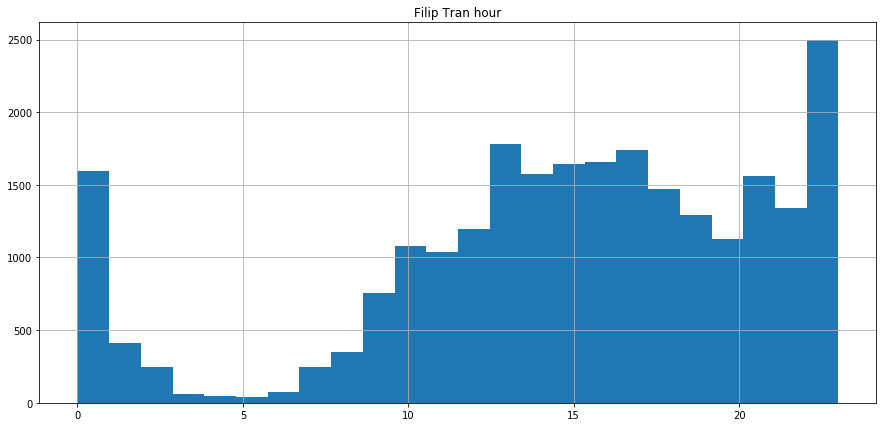

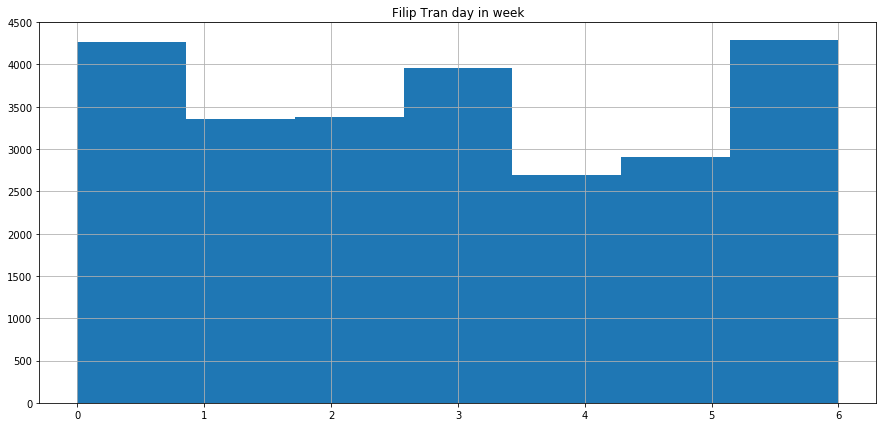

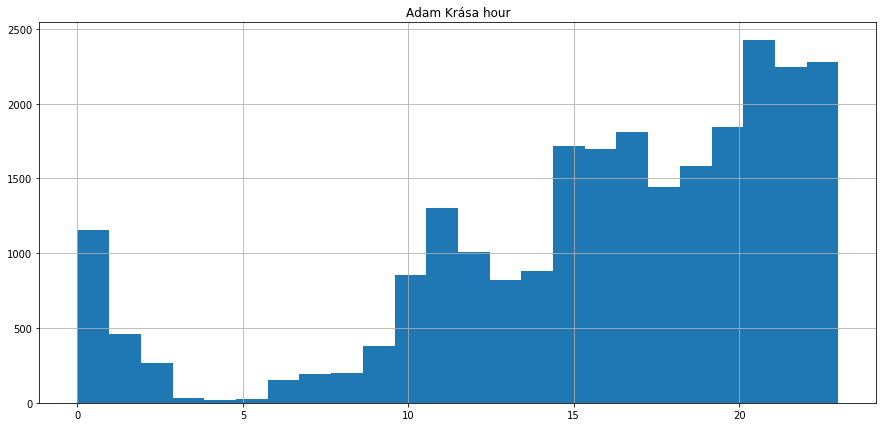

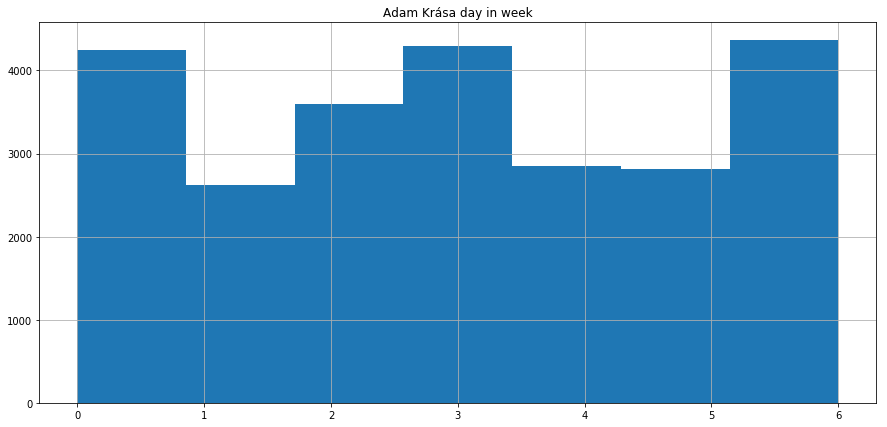

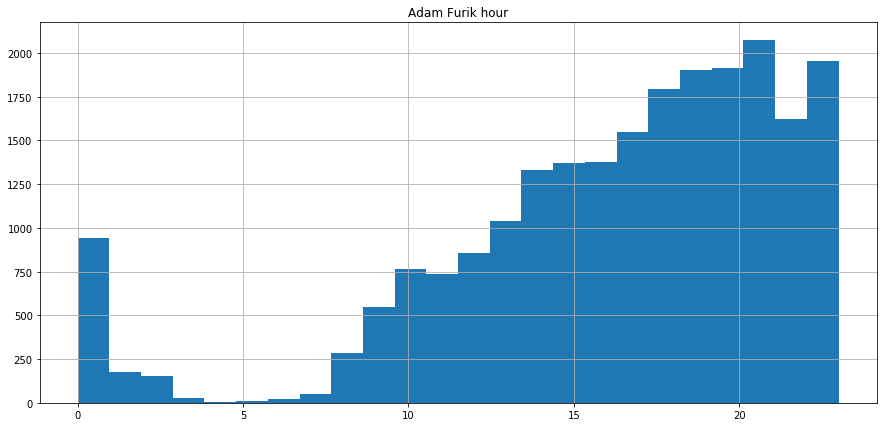

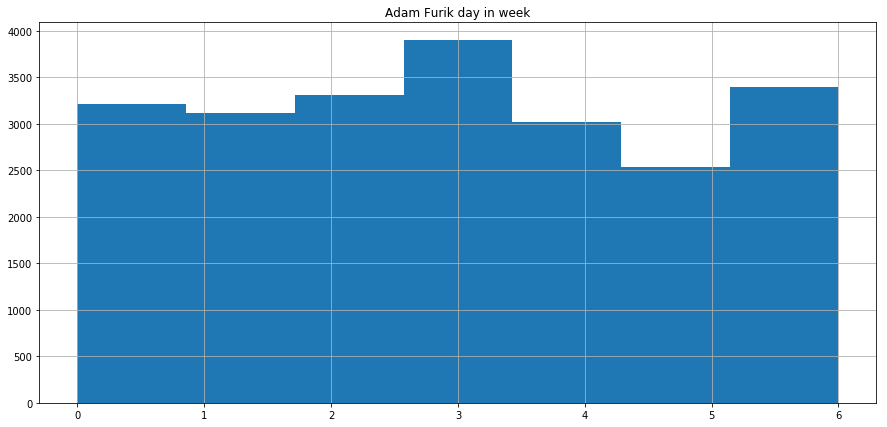

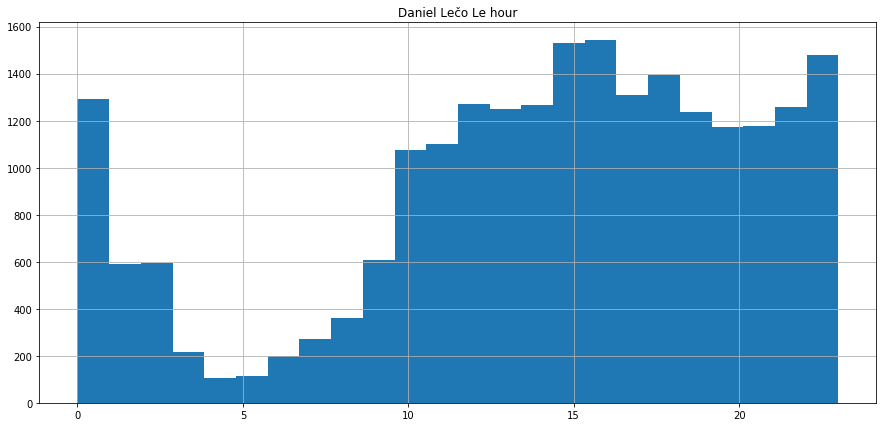

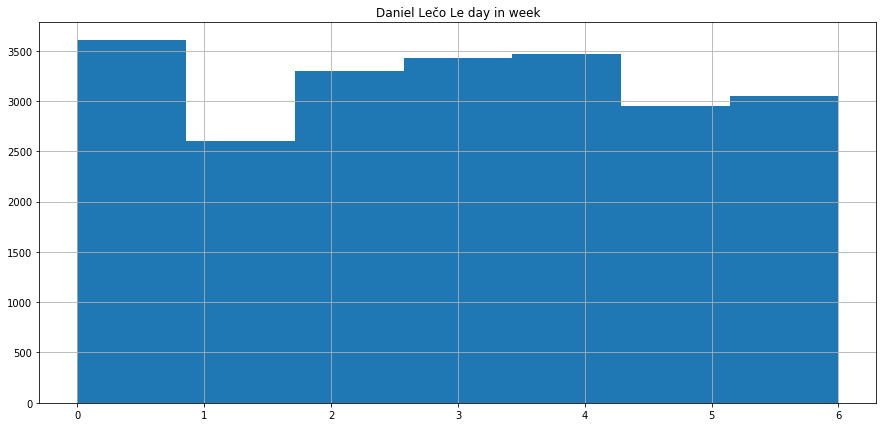

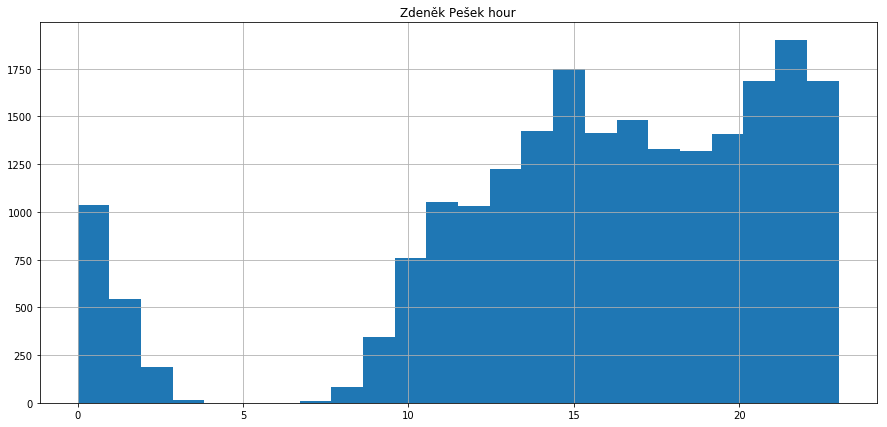

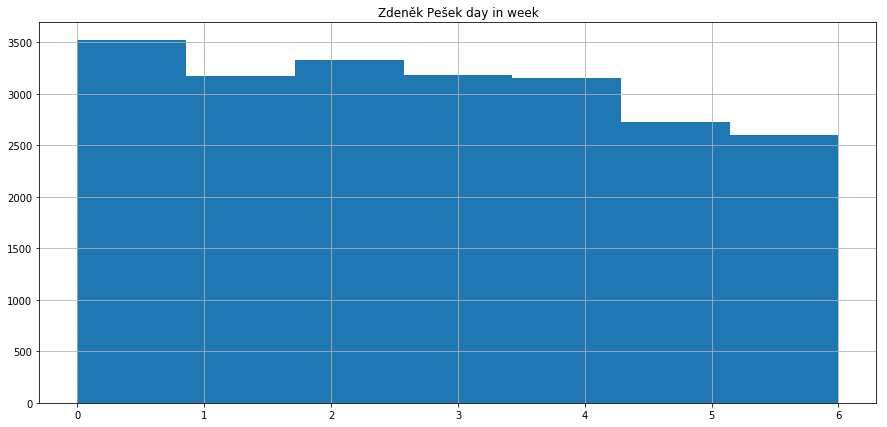

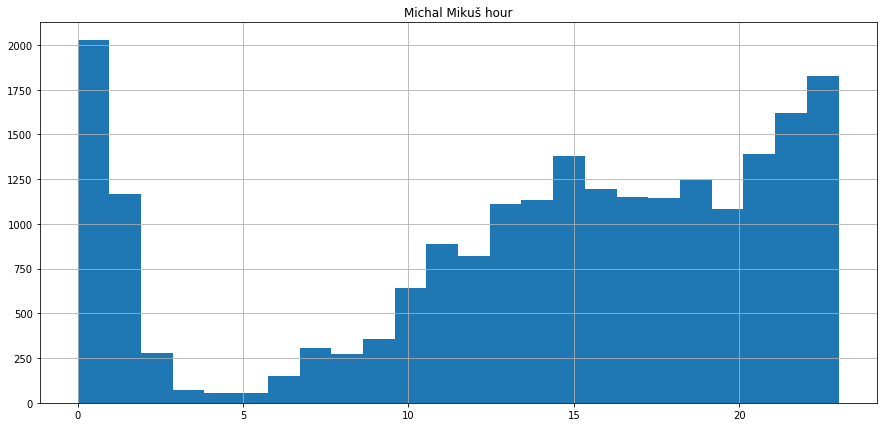

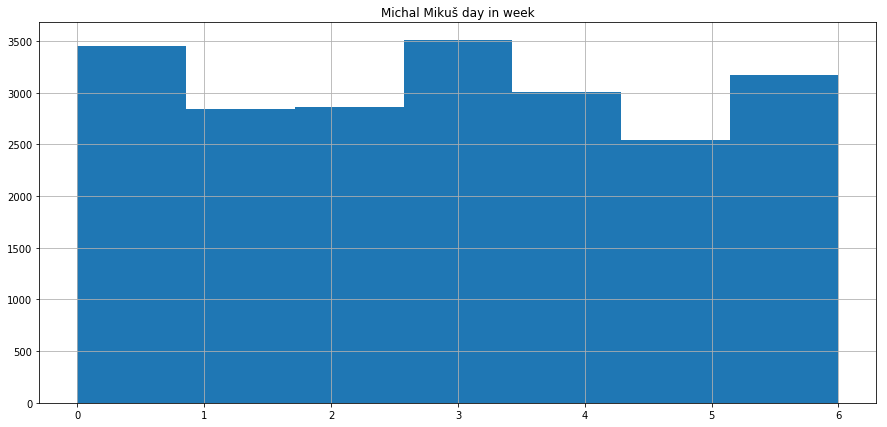

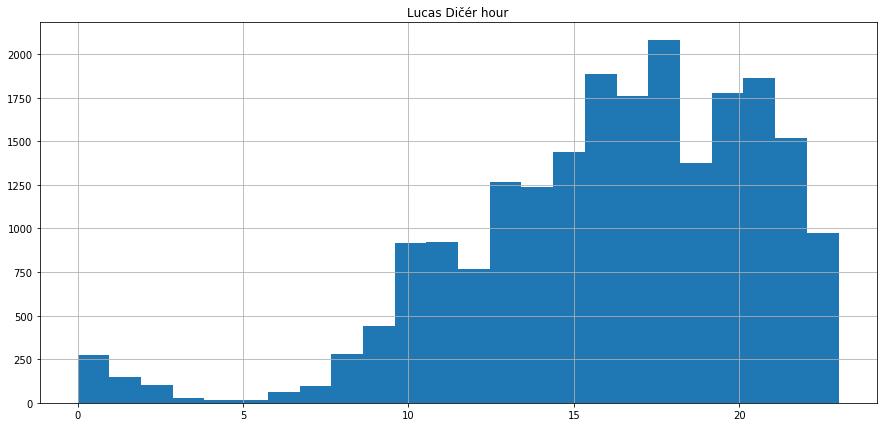

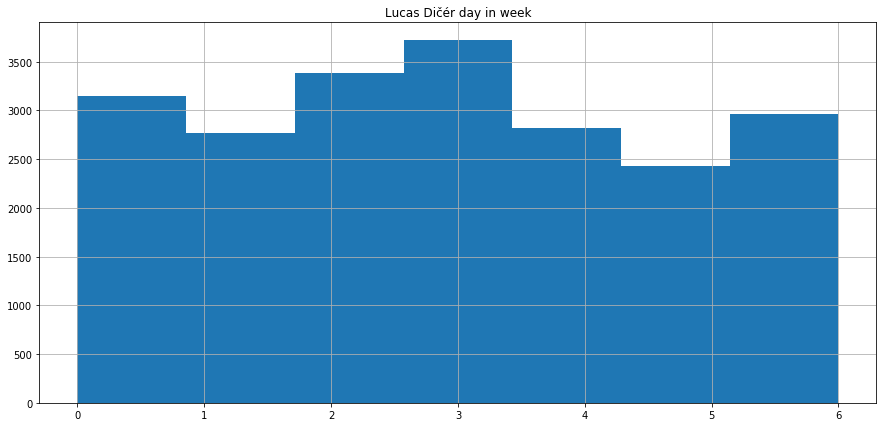

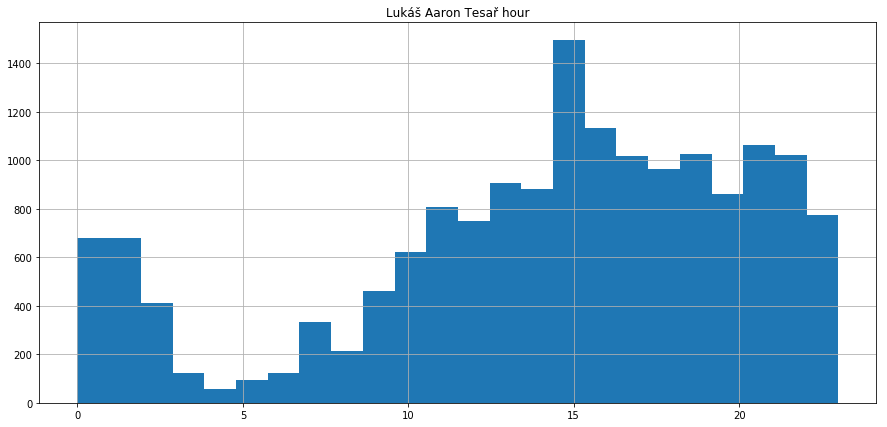

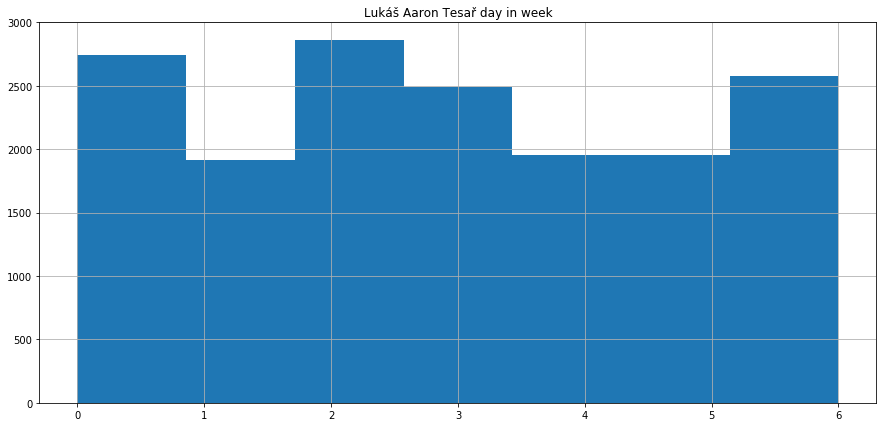

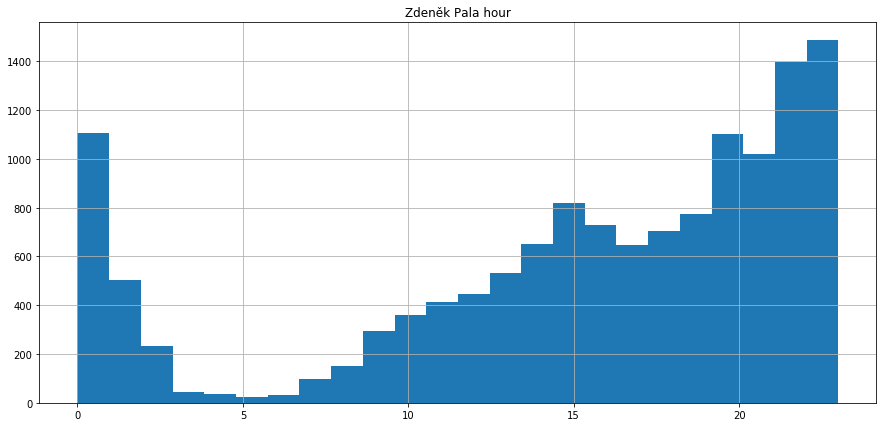

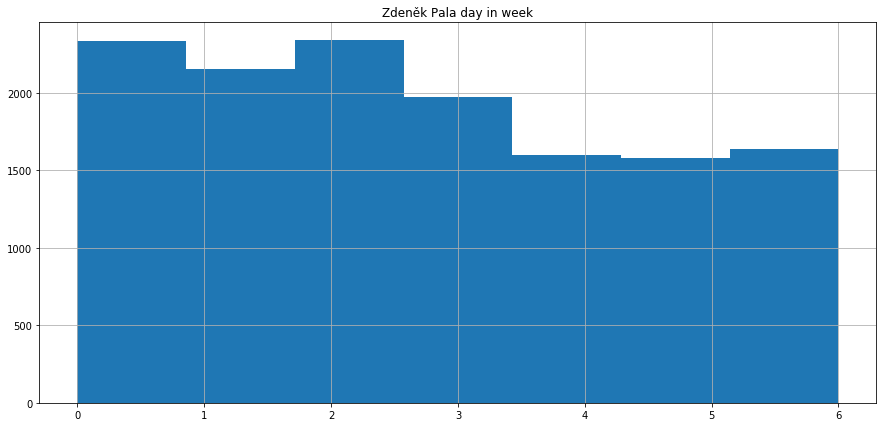

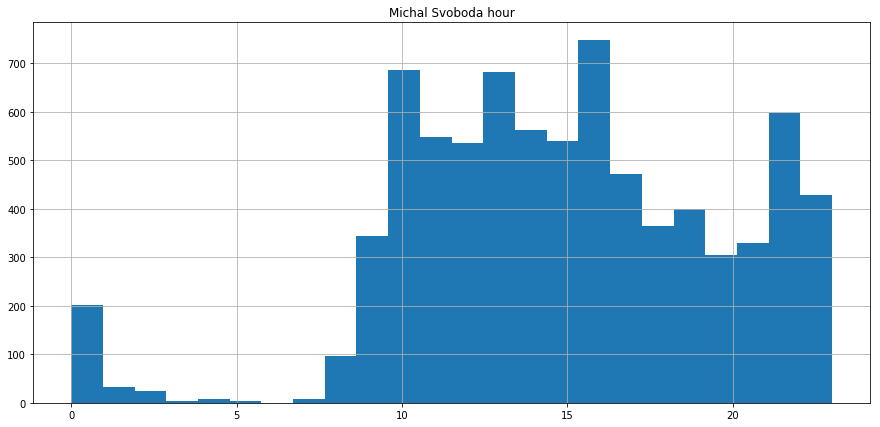

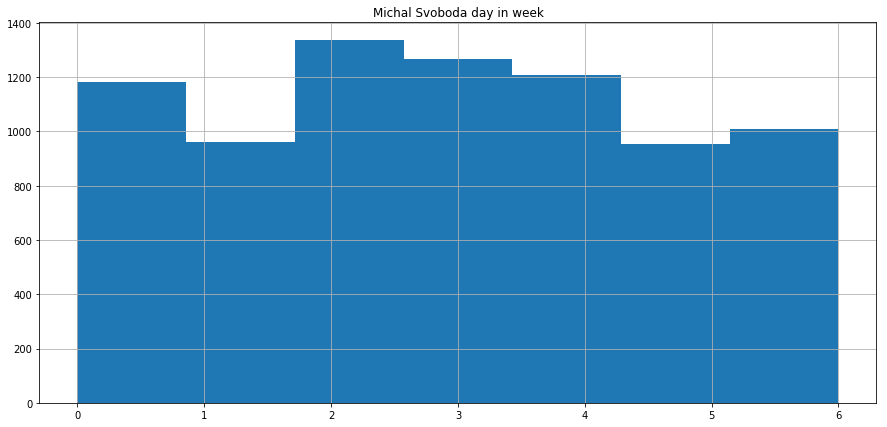

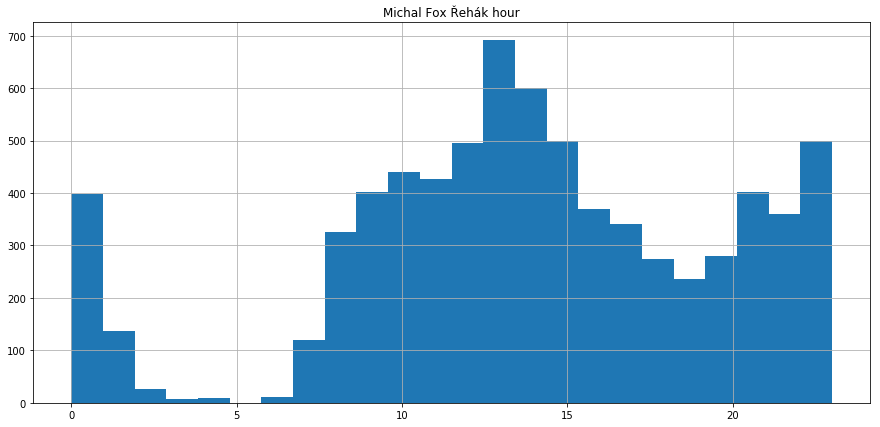

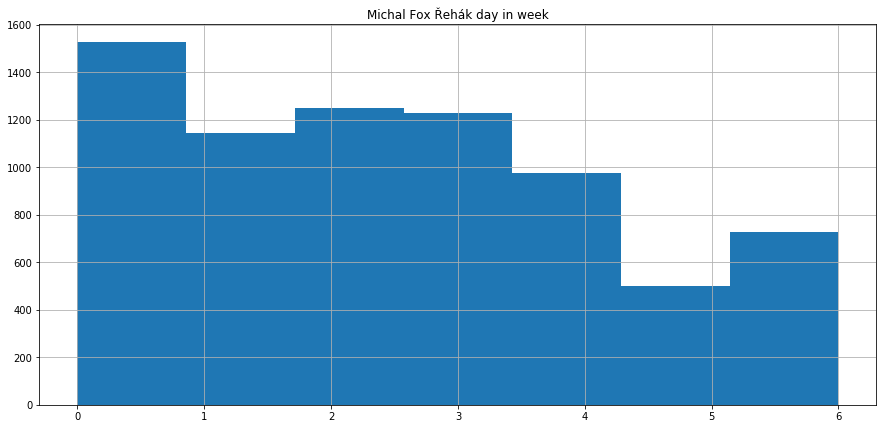

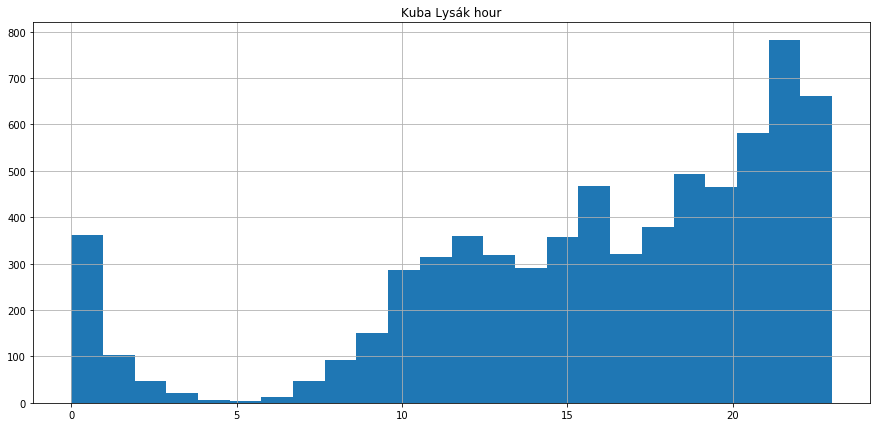

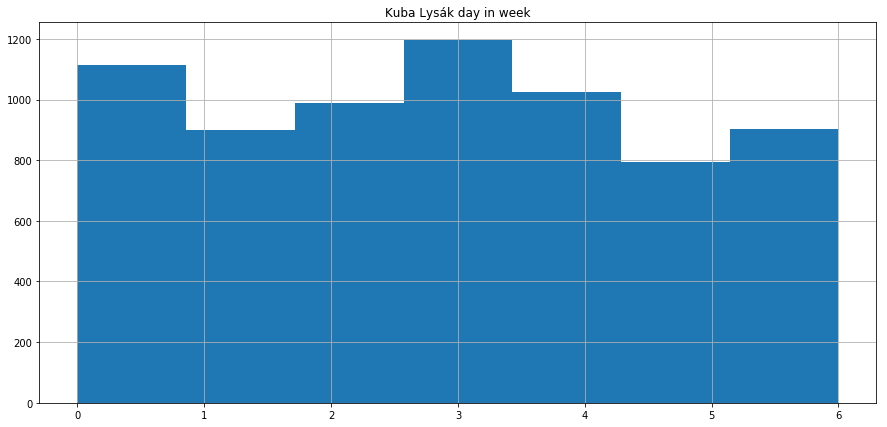

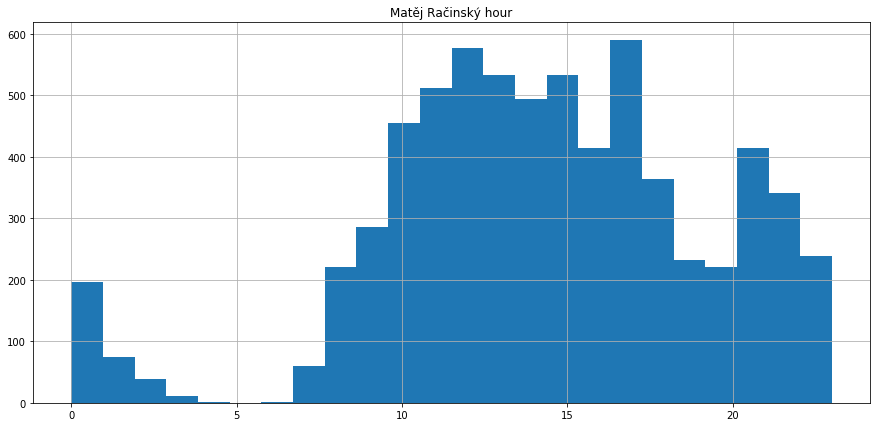

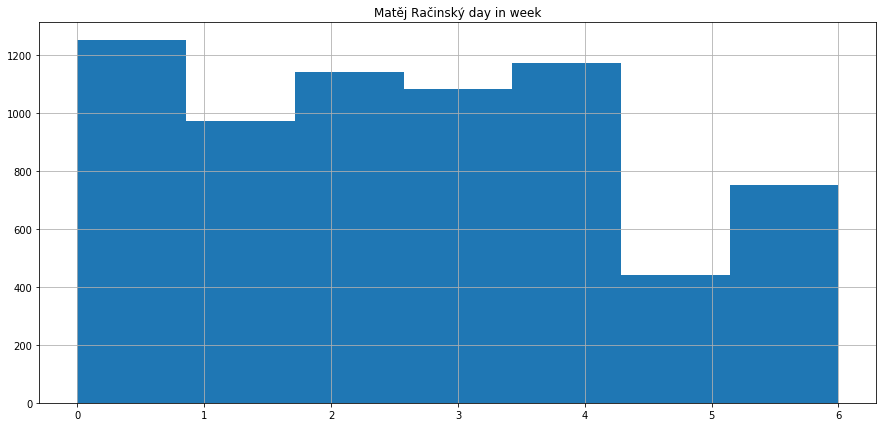

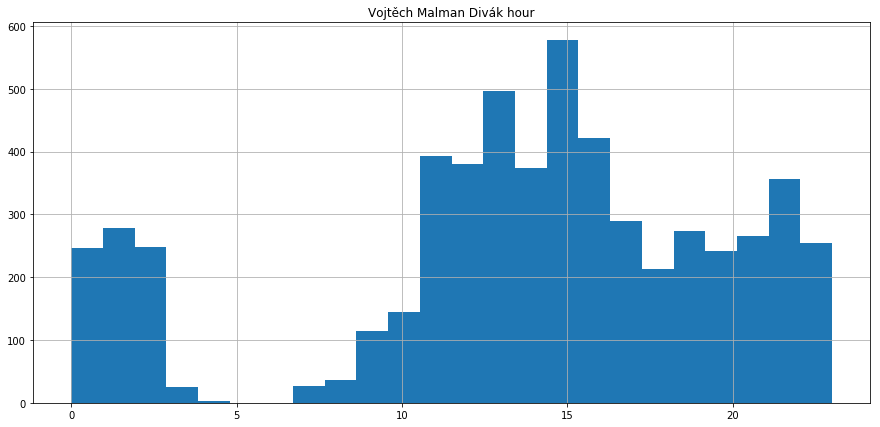

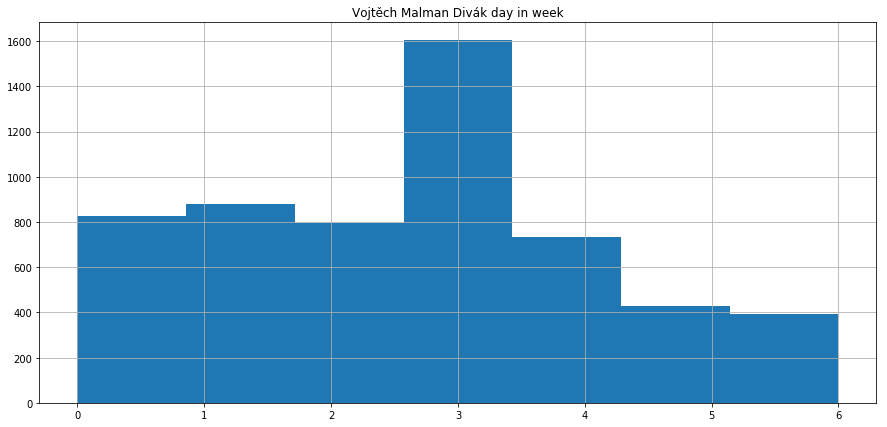

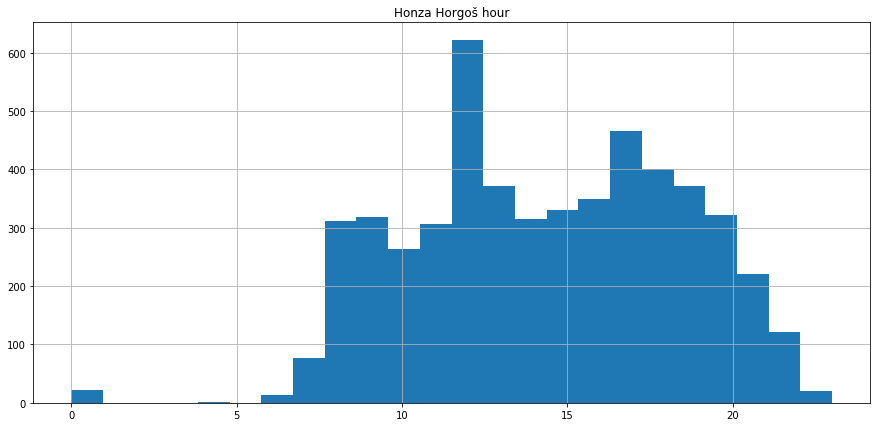

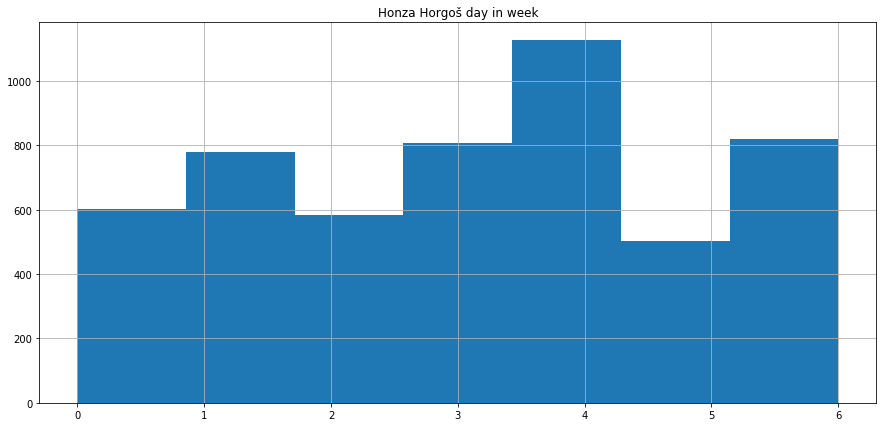

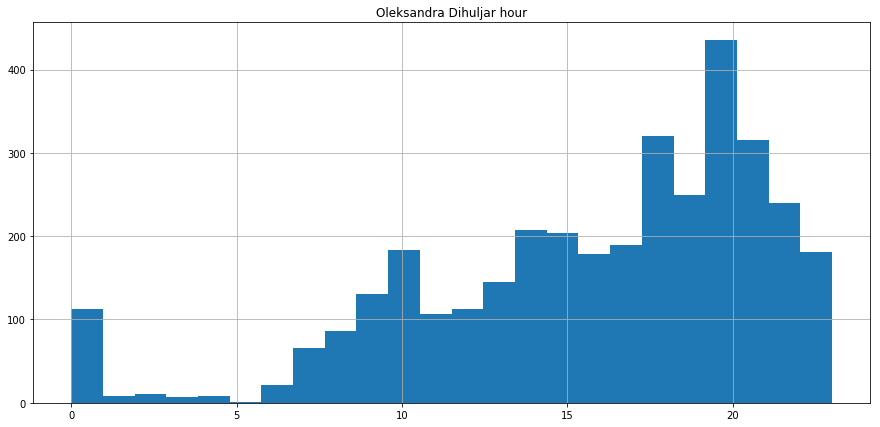

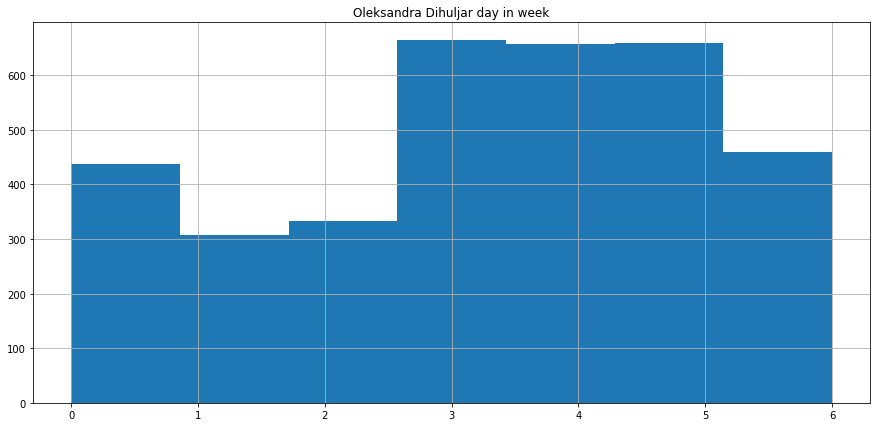

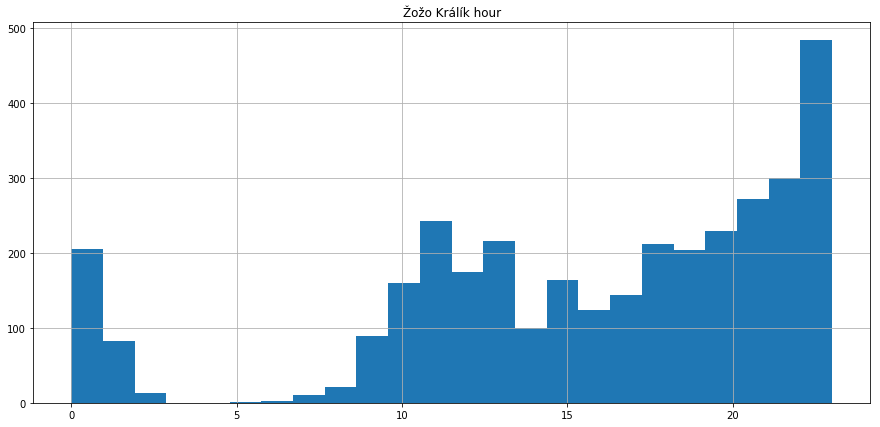

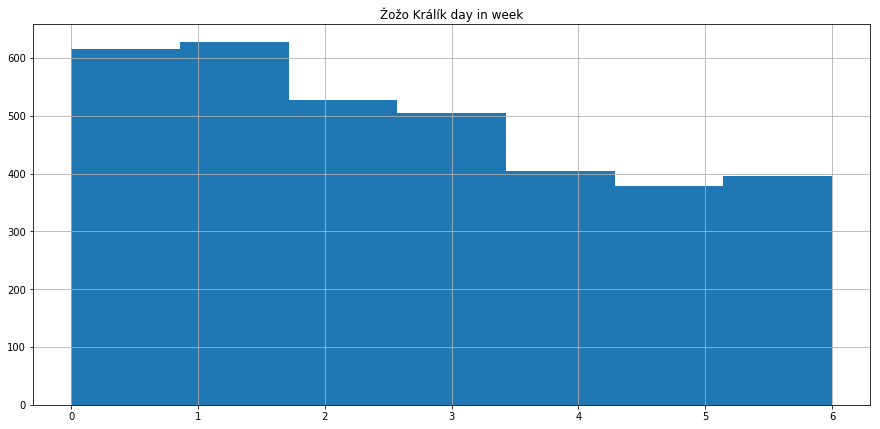

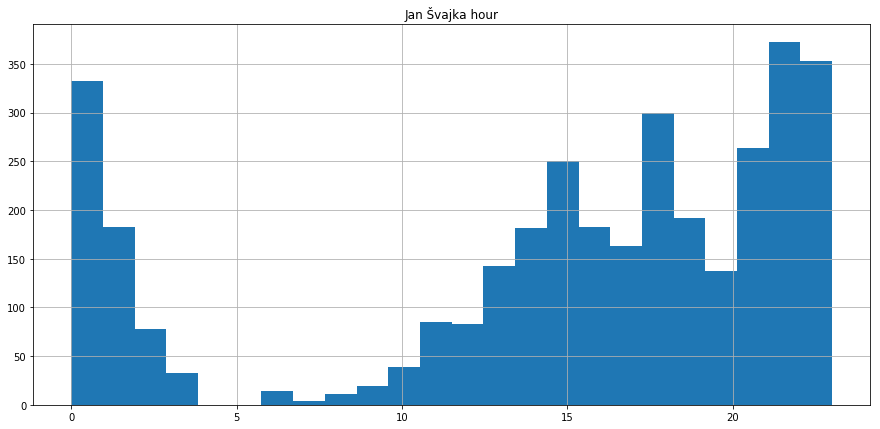

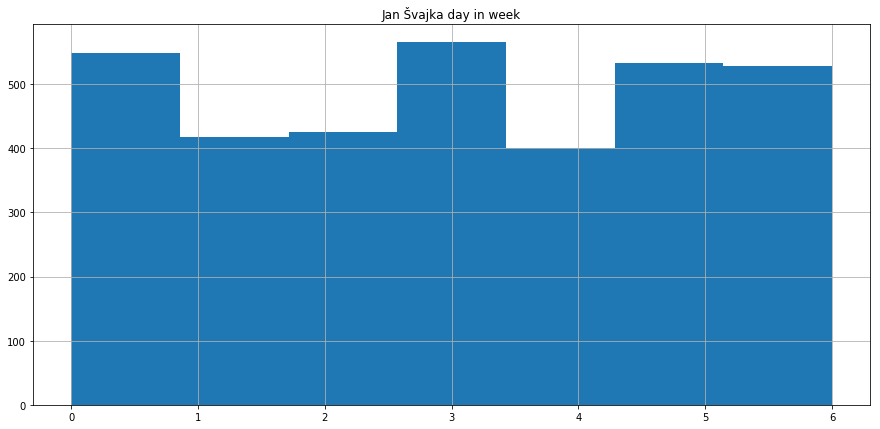

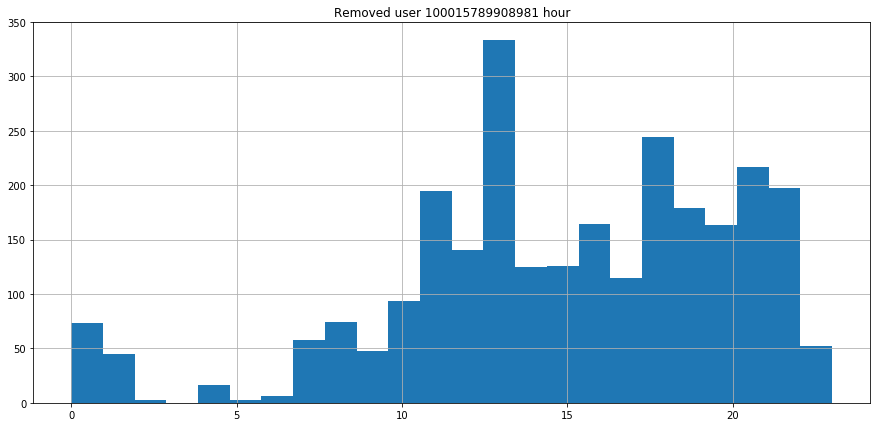

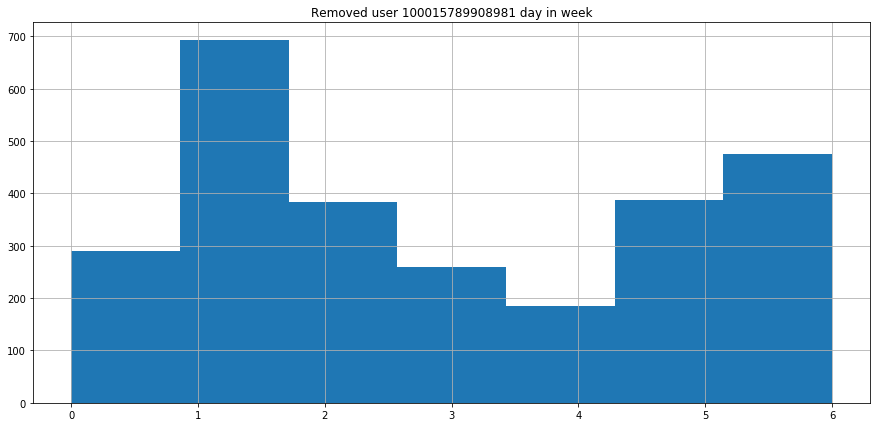

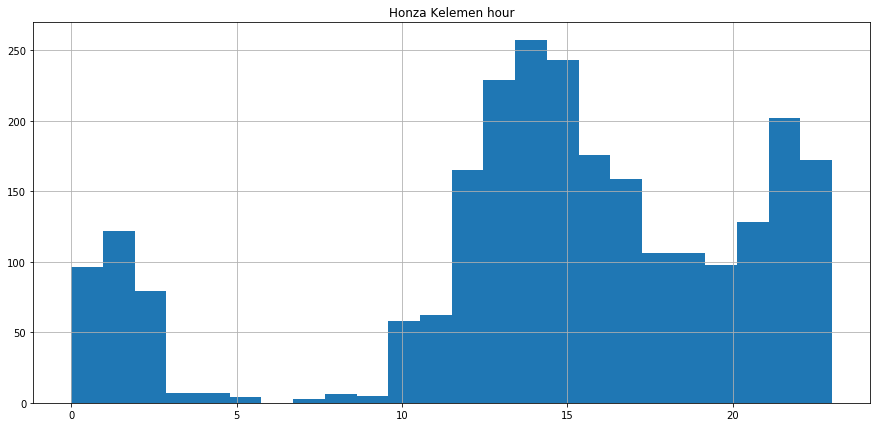

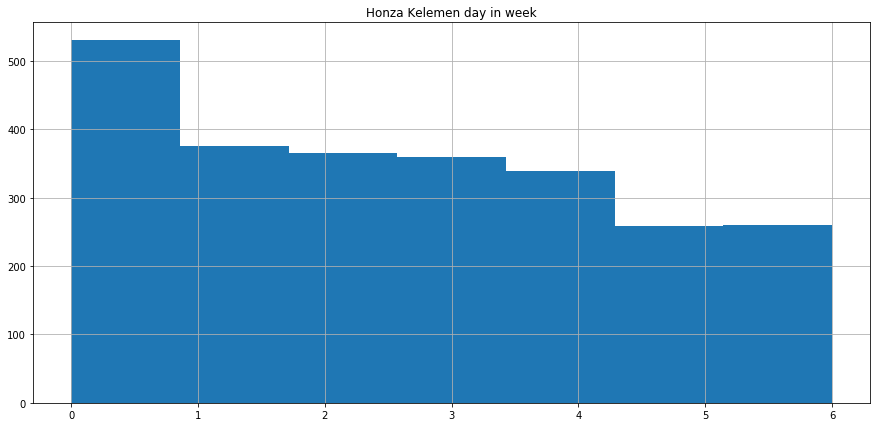

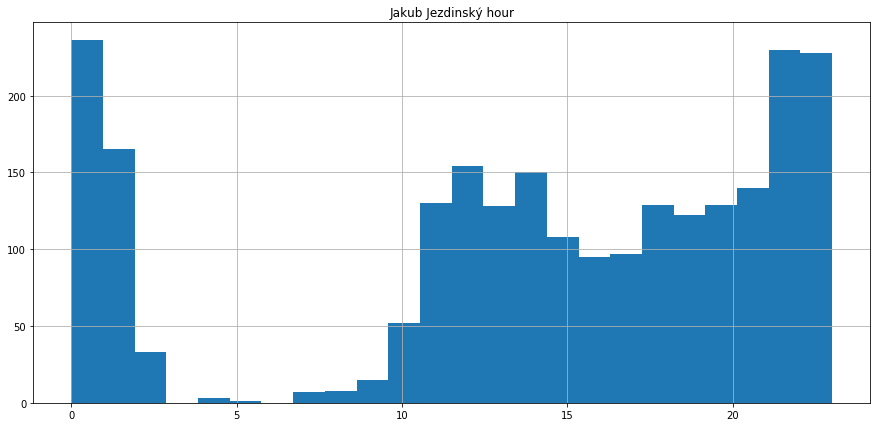

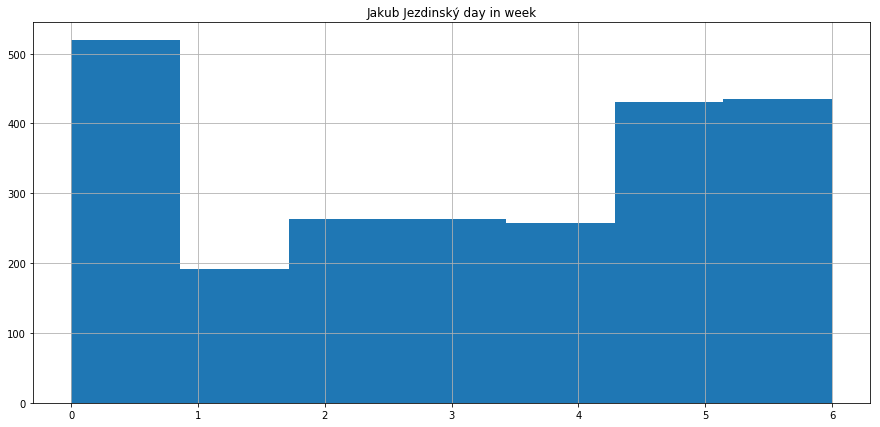

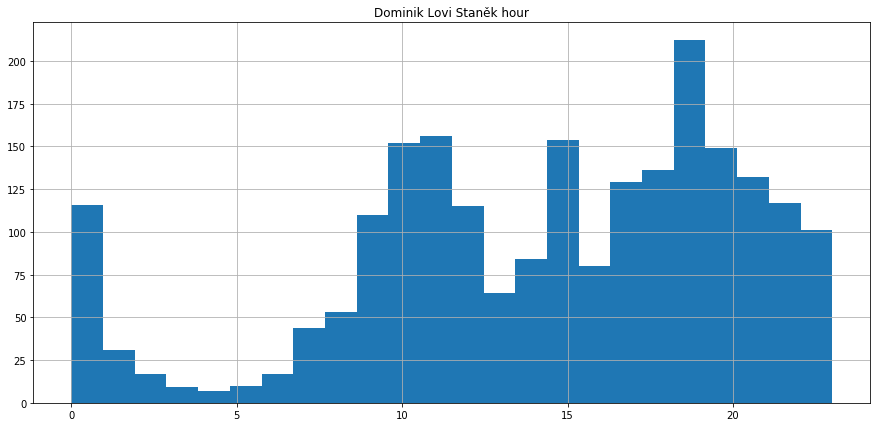

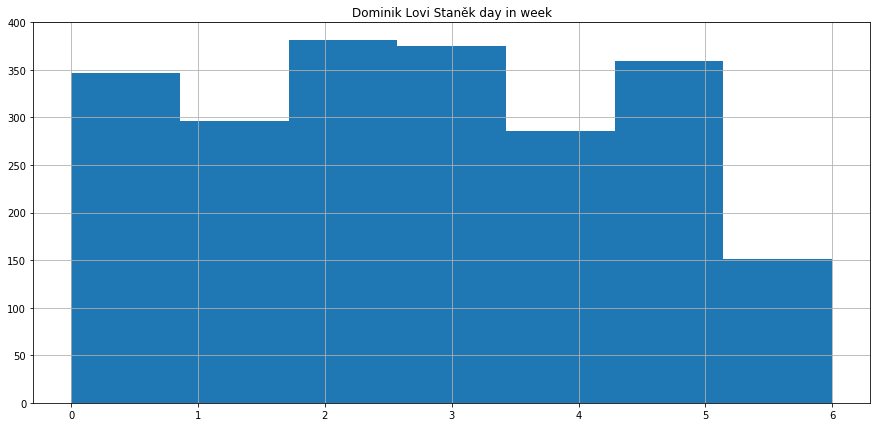

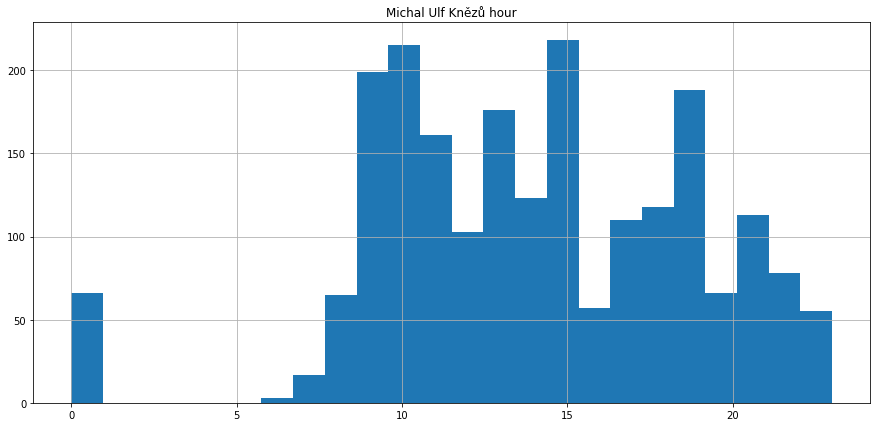

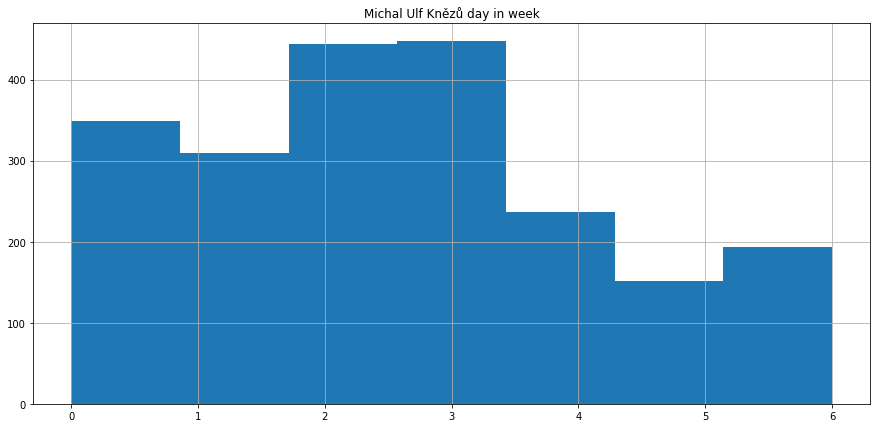

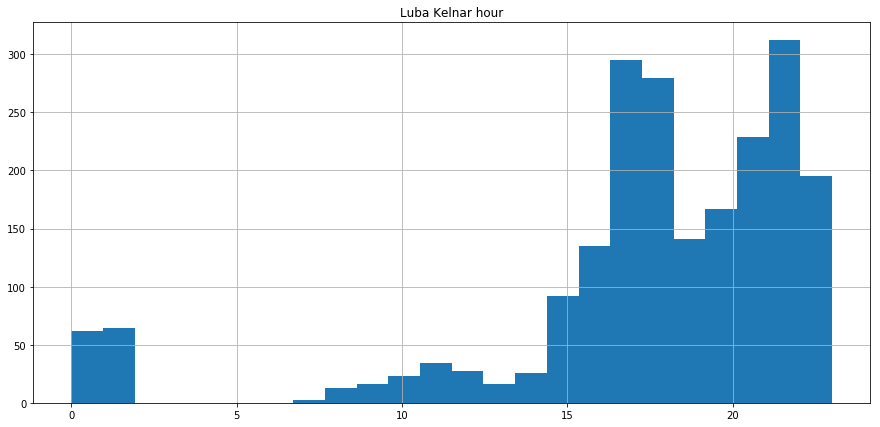

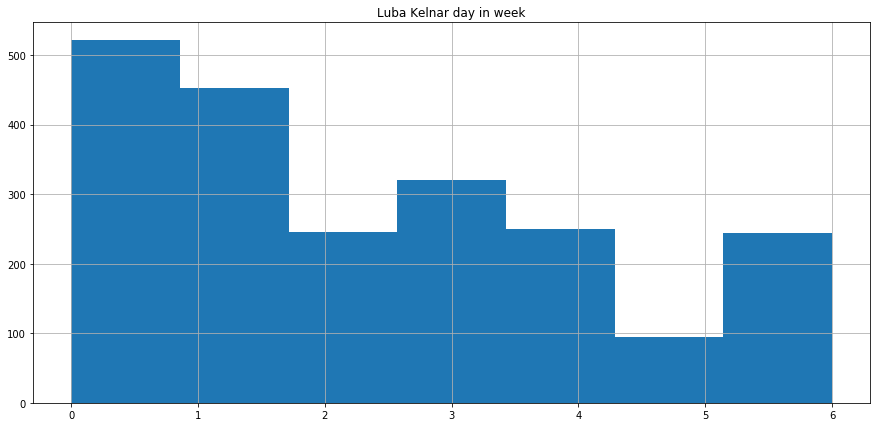

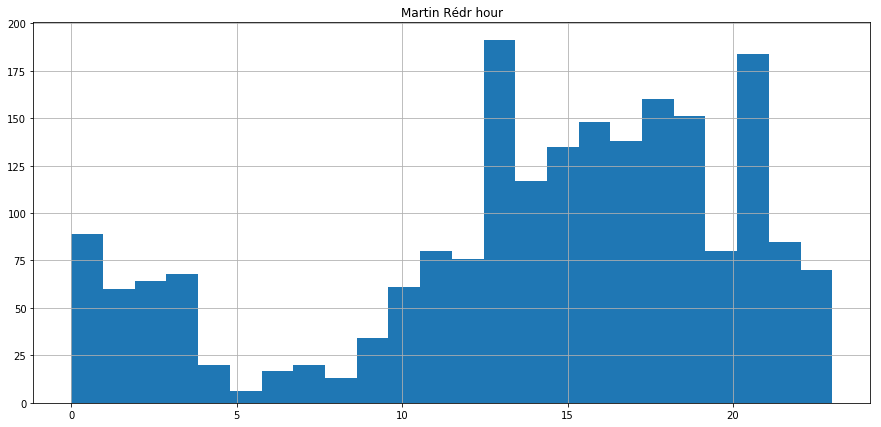

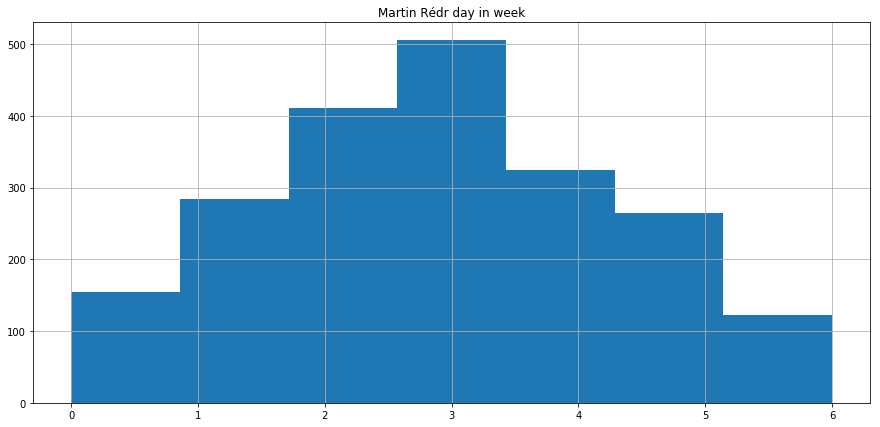

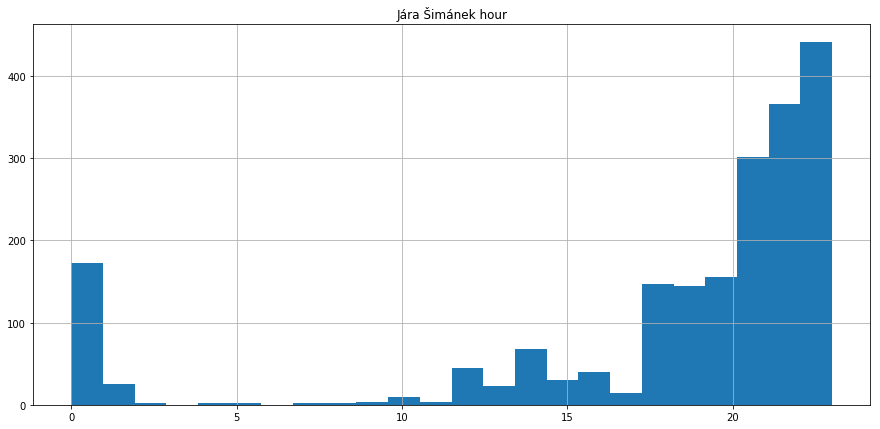

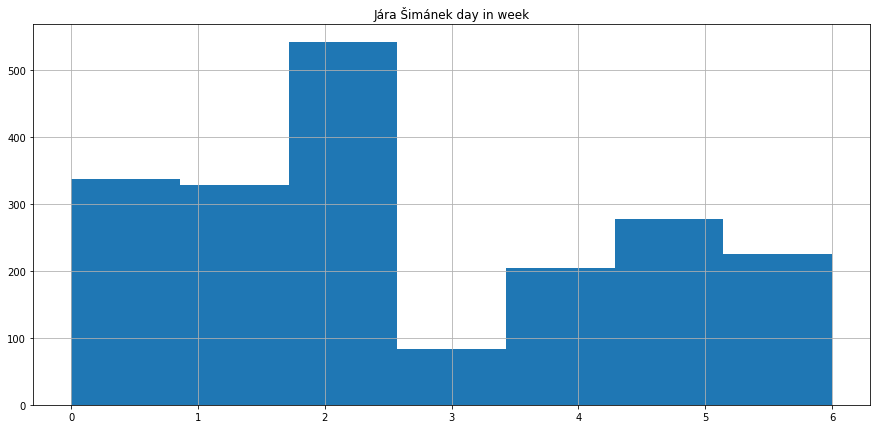

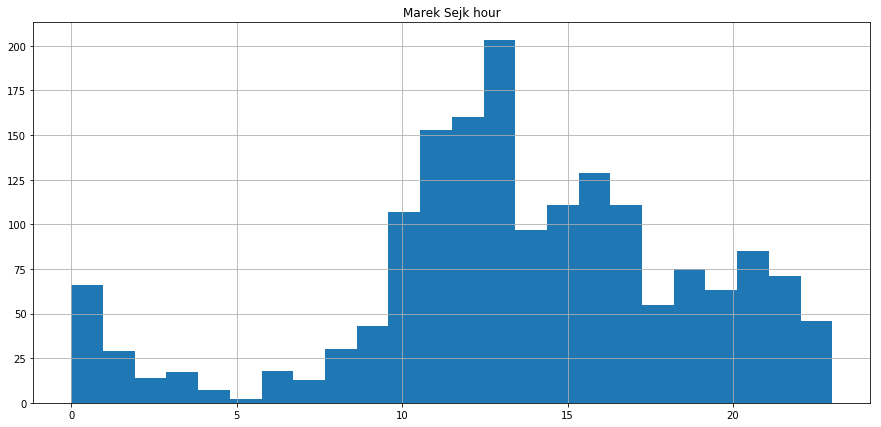

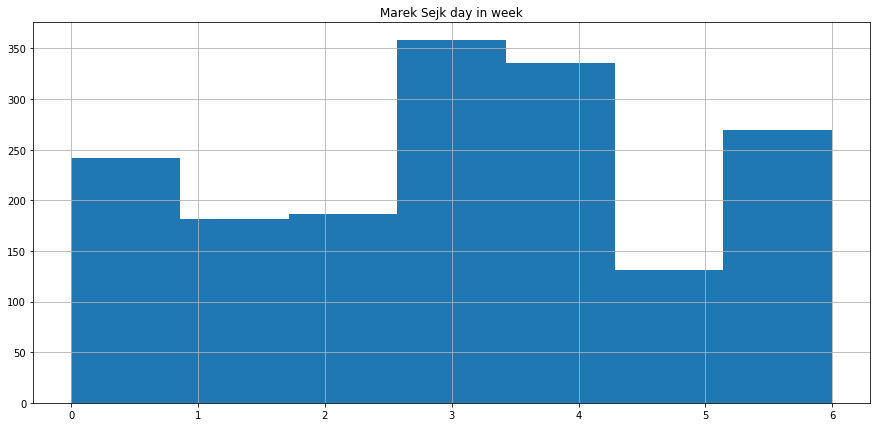

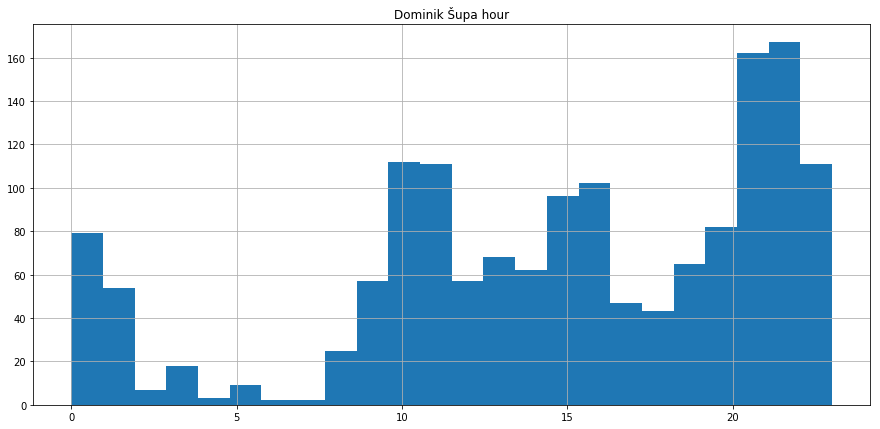

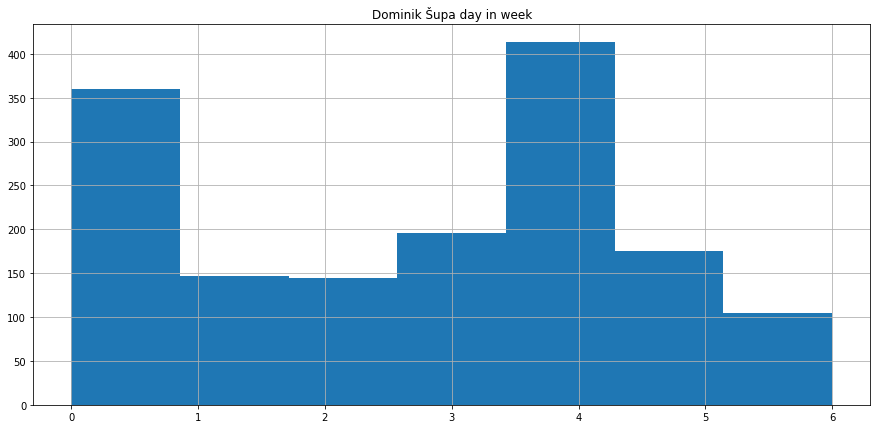

In [203]:
for username in df['UserName'].value_counts()[:30].index:
    plt.figure(figsize=(15, 7))
    plt.title(username + ' hour')
    df[df['UserName'] == username]['DateTime'].dt.hour.hist(bins=24)
    plt.figure(figsize=(15, 7))
    plt.title(username + ' day in week')
    df[df['UserName'] == username]['DateTime'].dt.dayofweek.hist(bins=7)
    # plt.figure(figsize=(15, 7))
    # plt.title(username + ' hour in week')
    # (df[df['UserName'] == username]['DateTime'].dt.dayofweek * 24 + df[df['UserName'] == username]['DateTime'].dt.hour).hist(bins=24 * 7)

### Analyzing how people interact with each other
Counting next message below X minutes threshold as an interaction. 


In [206]:
df = df.sort_values('DateTime')


In [220]:
df['DateTime'].diff().iloc[1:]

1        00:00:01
2        00:00:08
3        00:00:04
4        00:00:03
5        00:00:03
6        00:00:03
7        00:00:02
8        00:00:02
9        00:00:04
10       00:00:06
11       00:00:04
12       00:00:01
13       00:00:01
14       00:00:44
15       00:00:18
16       00:00:24
17       00:00:18
18       00:01:00
19       00:01:10
20       00:00:09
21       00:00:16
22       00:00:38
23       00:01:00
24       00:01:28
25       00:00:06
26       00:04:44
27       00:06:35
28       00:00:03
29       00:08:51
30       00:00:56
           ...   
336244   00:00:18
336245   00:00:13
336246   00:00:00
336247   00:00:07
336248   00:00:01
336249   00:00:06
336250   00:00:05
336251   00:00:07
336252   00:00:04
336253   00:00:03
336254   00:00:37
336255   00:00:24
336256   00:00:17
336257   00:01:21
336258   00:00:14
336259   00:00:14
336260   00:00:21
336261   00:00:37
336262   00:01:37
336263   00:00:11
336264   00:00:14
336265   00:00:02
336266   00:00:00
336267   00:00:09
336268   0

In [227]:
diff_sec = df['DateTime'].diff().iloc[1:].dt.total_seconds()    # type: pd.Series
diff_sec

1           1.0
2           8.0
3           4.0
4           3.0
5           3.0
6           3.0
7           2.0
8           2.0
9           4.0
10          6.0
11          4.0
12          1.0
13          1.0
14         44.0
15         18.0
16         24.0
17         18.0
18         60.0
19         70.0
20          9.0
21         16.0
22         38.0
23         60.0
24         88.0
25          6.0
26        284.0
27        395.0
28          3.0
29        531.0
30         56.0
          ...  
336244     18.0
336245     13.0
336246      0.0
336247      7.0
336248      1.0
336249      6.0
336250      5.0
336251      7.0
336252      4.0
336253      3.0
336254     37.0
336255     24.0
336256     17.0
336257     81.0
336258     14.0
336259     14.0
336260     21.0
336261     37.0
336262     97.0
336263     11.0
336264     14.0
336265      2.0
336266      0.0
336267      9.0
336268     12.0
336269     16.0
336270      6.0
336271     11.0
336272     10.0
336273    178.0
Name: DateTime, Length: 

In [228]:
diff_sec.value_counts()

3.0        17932
2.0        17817
4.0        17371
5.0        16430
1.0        15819
6.0        15330
7.0        13674
8.0        12368
9.0        11340
10.0       10226
11.0        9200
12.0        8372
13.0        7571
14.0        7013
15.0        6230
0.0         6185
16.0        5770
17.0        5220
18.0        4711
19.0        4386
20.0        4075
21.0        3643
22.0        3462
23.0        3091
24.0        2992
25.0        2689
26.0        2669
27.0        2456
28.0        2256
29.0        2102
           ...  
24158.0        1
24156.0        1
3019.0         1
24150.0        1
12069.0        1
4140.0         1
2098.0         1
3029.0         1
12129.0        1
6121.0         1
9098.0         1
12239.0        1
6117.0         1
2334.0         1
3057.0         1
12226.0        1
2008.0         1
9096.0         1
6102.0         1
12179.0        1
25104.0        1
12177.0        1
2662.0         1
24333.0        1
24329.0        1
3039.0         1
6075.0         1
4144.0        

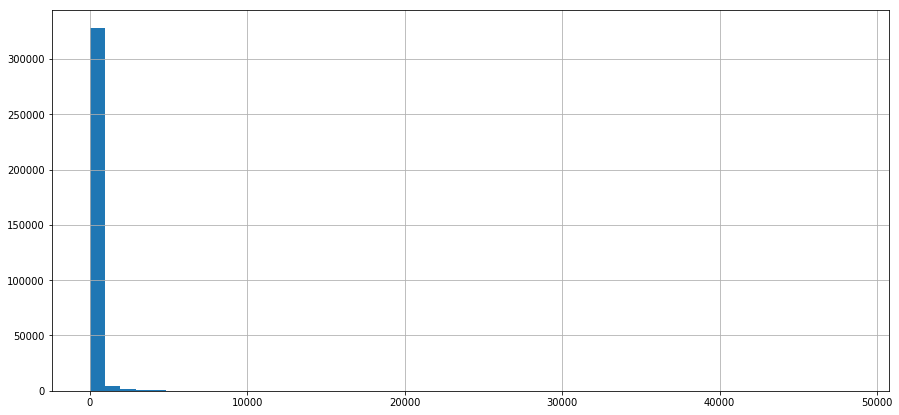

In [238]:
diff_sec.hist(bins=50, figsize=(15, 7))

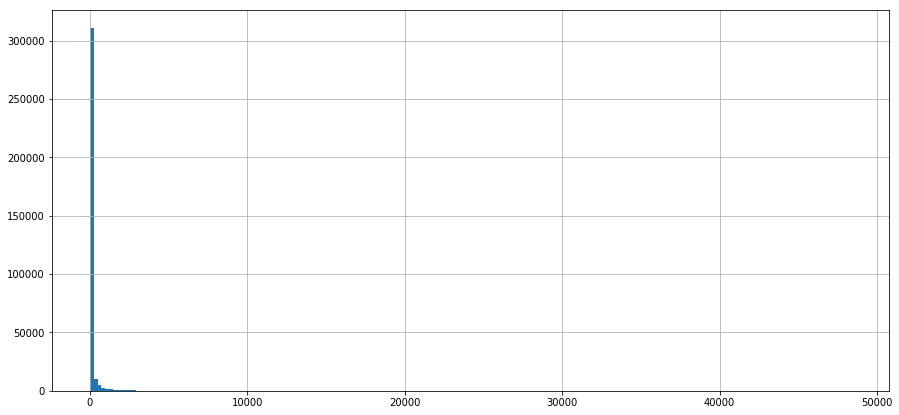

In [239]:
diff_sec.hist(bins=200, figsize=(15, 7))

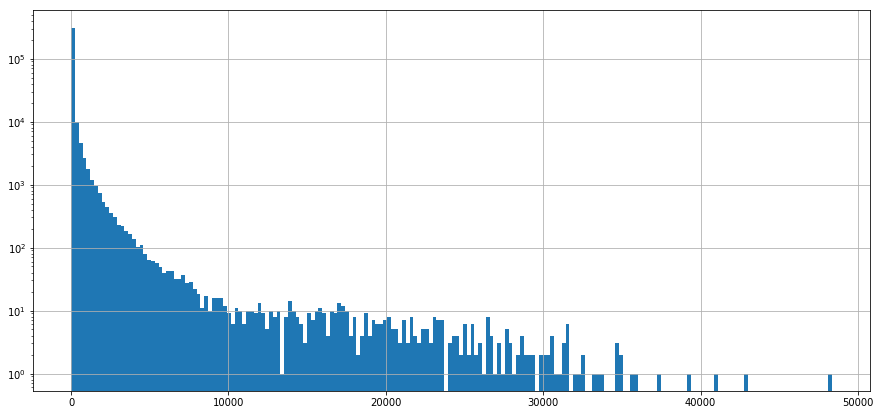

In [244]:
diff_sec.hist(bins=200, figsize=(15, 7), log=True)

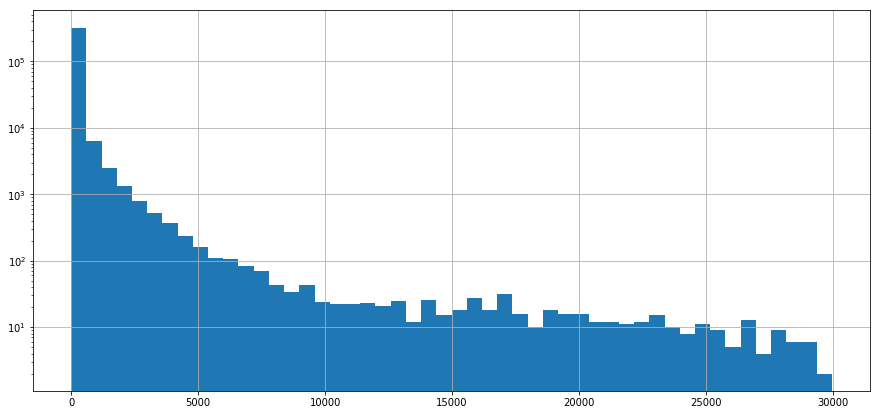

In [242]:
diff_sec[diff_sec < 30000].hist(bins=50, figsize=(15, 7), log=True)

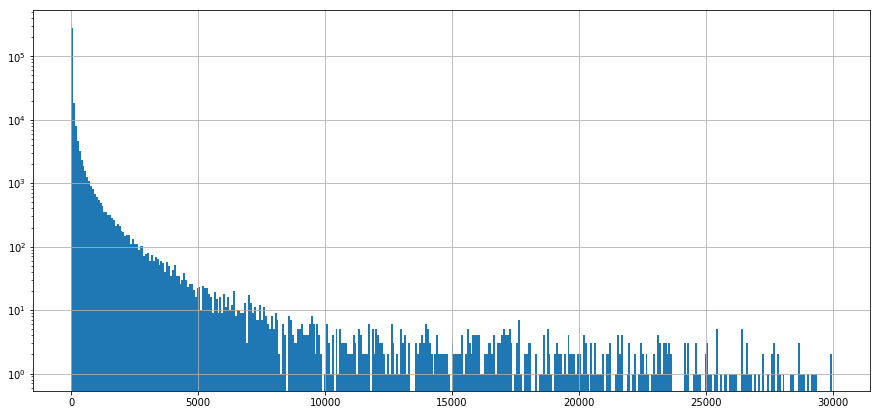

In [246]:
diff_sec[diff_sec < 30000].hist(bins=400, figsize=(15, 7), log=True)

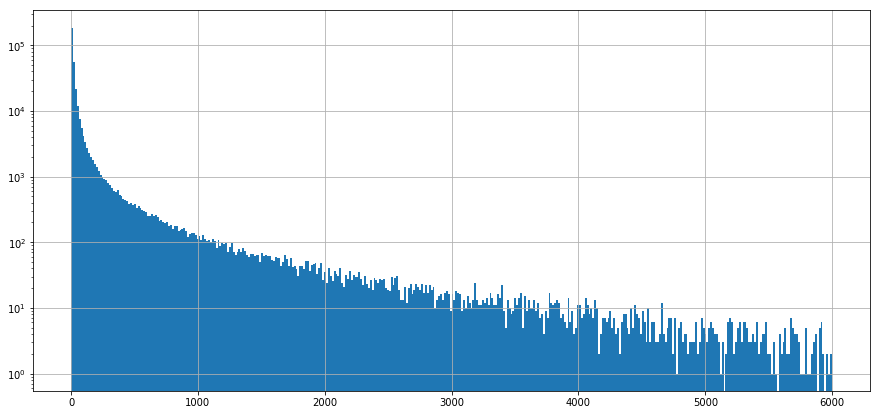

In [251]:
diff_sec[diff_sec < 6000].hist(bins=400, figsize=(15, 7), log=True)

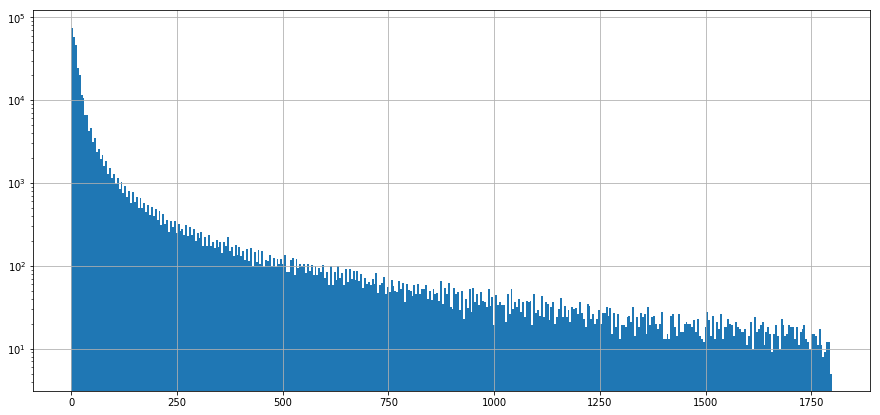

In [254]:
diff_sec[diff_sec < 1800].hist(bins=400, figsize=(15, 7), log=True)

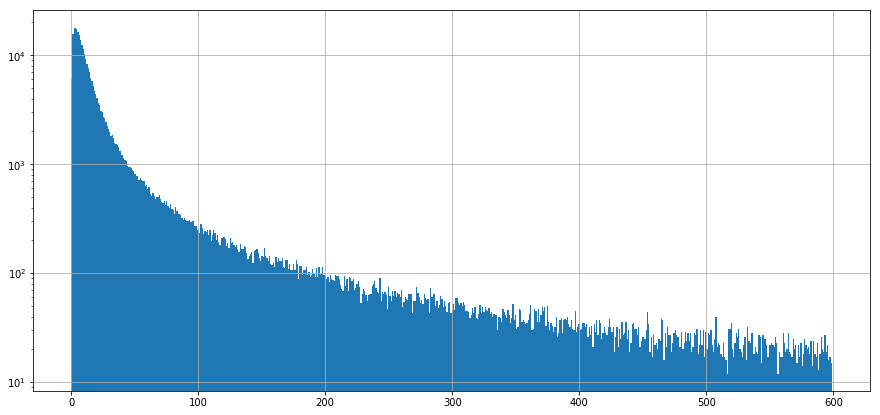

In [257]:
diff_sec[diff_sec < 600].hist(bins=600, figsize=(15, 7), log=True)

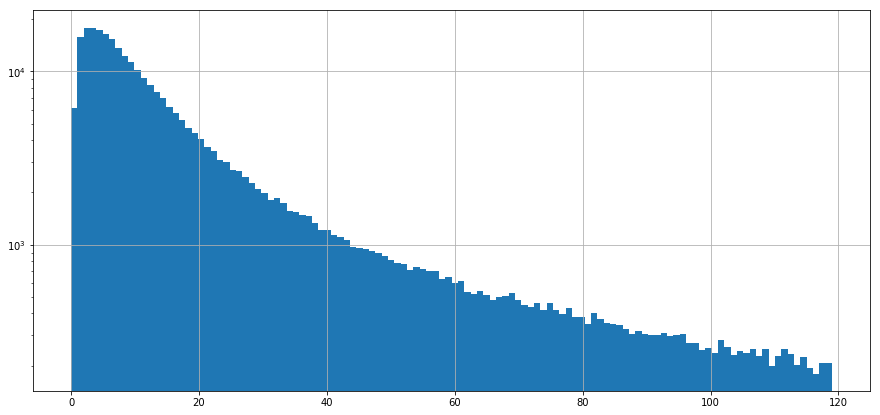

In [258]:
diff_sec[diff_sec < 120].hist(bins=120, figsize=(15, 7), log=True)

In [260]:
diff_sec.median()

12.0

In [269]:
list(np.arange(0., 1.1, .2))

[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0]

In [274]:
diff_sec.quantile(np.arange(0., 1.01, .02))

0.00        0.0
0.02        1.0
0.04        1.0
0.06        1.0
0.08        2.0
0.10        2.0
0.12        3.0
0.14        3.0
0.16        3.0
0.18        4.0
0.20        4.0
0.22        4.0
0.24        5.0
0.26        5.0
0.28        6.0
0.30        6.0
0.32        7.0
0.34        7.0
0.36        8.0
0.38        8.0
0.40        9.0
0.42        9.0
0.44       10.0
0.46       11.0
0.48       11.0
0.50       12.0
0.52       13.0
0.54       14.0
0.56       15.0
0.58       16.0
0.60       17.0
0.62       18.0
0.64       20.0
0.66       22.0
0.68       24.0
0.70       26.0
0.72       29.0
0.74       33.0
0.76       37.0
0.78       43.0
0.80       50.0
0.82       60.0
0.84       73.0
0.86       91.0
0.88      118.0
0.90      159.0
0.92      225.0
0.94      348.0
0.96      593.0
0.98     1240.0
1.00    48346.0
Name: DateTime, dtype: float64

Looks like 120 seconds will be a good threshold for marking message as part of an interaction.

